# Practice 1: Statistical analysis of the Lipinski's rule of five

> **Note:** This book is available in two ways:
> 1. Downloading the repository and following the instructions in the file [README.md](https://github.com/ramirezlab/CHEMO/blob/main/README.md)
> 2. Clicking here on [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ramirezlab/CHEMO/blob/main/2_PART_TWO/2.3_Practice-1.en.ipynb?hl=es)

## Concepts to work

### **Pharmacokinetics**

Pharmacokinetics are the study of what happens to a compound in an organism over a period of time<sup> **1** </sup>. It is divide into four steps: **A**bsorption, **D**istribution, **M**etabolism and **E**xcretion (ADME)<sup> **1, 2** </sup> . Some times also is includes **T**oxicology (ADMET) and **L**iberation (LADME).

 
<img src="img/ADME-en.jpg" alt="ADME" width="800"/>

*Figure 1*. Steps that make up the pharmacokinetics. From: [Somvanshi, Kharat, Jadhav, Thorat & Townley, 2021](https://doi.org/10.1016/B978-0-323-85050-6.00007-4)

   * **Absorption:** It refers to the amount and time it takes for a compound or substance to enter to the systemic circulation from the site of administration. It depends on multiple factors such as the ability of the compound to penetrate the intestinal wall, the solubility of the compound, the gastric emptying time, the chemical stability of the compound in the stomach, among others<sup> **1, 2** </sup>.
   * **Distribution:** It refers to how a substance is spread throughout the body. It depends on the diffusion and convection which may be influenced by the polarity, size, or binding abilities of the drug, the fluid status of the patient, or the body habitus of the individual. It is very important to achieve the effective drug concentration in the receptor site because to be effective a medication must reach its designated compartmental destination<sup> **1, 2** </sup>.
   * **Metabolism:** It refers to the processing of the drug by the body into subsequent compounds. It can be also to convert a drug  into more water-soluble substances in order to be more easily to excreted or in the case of prodrugs the metabolism is required to convert the drug into active metabolites<sup> **1, 2** </sup>.
   * **Excretion:** It refers to the process by which the drug is eliminated from the body. Generally the kidneys are the conduct of excretion by a passive filtration in the glomerulus or secretion in the tubules<sup> **1, 2** </sup>.

### **Lipinski's rule of five:**

The Lipinski's rule of five is one way to screen out compounds with probable absorption problems. This rule states that poor absorption or permeation of a drug is more probable when the chemical structure fulfils two or more of the following criteria<sup> **3** </sup>:
1. Molecular weight (MW) is greater than 500.
2. The calculated log P value is above 5.
3. There are more than 5 hydrogen bond donors (–NH–, –OH).
4. The number of hydrogen bond acceptors (–N ¼ , –O–) is greater than 10.

It is important to know that the rule of five does not definitively categorize all well and poorly absorbed compounds, although it is simple, fast, and provides a reasonable degree of classification.

## Problem Statement

For an investigation of a new drug we want to know if it is really absorbed by the body, if it is able to cross certain barriers to reach his target, how is it metabolized and how is excreted from the body. In this way doctors will have greater flexibility in prescribing and administering medications thus providing greater benefit with less risk and making adjustments as necessary, given the varied physiology and lifestyles of patients.

In order to know the absorption of the compounds we will use bioinformatic tools to be able to calculate Lipinski's rule of five and then we will calculate some statistics to plot them and analyze.

## Import the necessary libraries

In [9]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
from rdkit.Chem import Draw
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from math import pi
import os
from pathlib import Path

## Load dataset of P49841
The dataset contain the bioactive compounds against Glycogen synthase kinase-3 beta that we built in the tutorial 2.1_Dataframes.
The first thing we are going to do is import the database, we have to create a `root directory` (`ROOT_DIR`) to be able to navigate to the file.


In [10]:
import pandas as pd
csv_url = 'https://raw.githubusercontent.com/ramirezlab/CHEMO/main/2_PART_TWO/data/compounds_P49841_full.csv'
df_output = pd.read_csv(csv_url)
df_output.head()

,molecule_chembl_id,pchembl_value,smiles,ROMol
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...


## Lipinski's rule of five

The function below will allow us to calculate the chemical properties of Lipinski's rule of five having as input the SMILES. Then the conditions of the rule of five will be defined and finally we will have information whetherrule of five is violated.

In [11]:
def Ro5(df):
    
    smi = df['smiles']
    m = Chem.MolFromSmiles(smi)
    
    # Calculate rule of five chemical properties
    MW = Descriptors.ExactMolWt(m)
    HBA = Descriptors.NumHAcceptors(m)
    HBD = Descriptors.NumHDonors(m)
    LogP = Descriptors.MolLogP(m)
    
    # Rule of five conditions
    conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]
    
    # Create pandas row for conditions results with values and information whether rule of five is violated 
    return pd.Series([MW, HBA, HBD, LogP, 'yes']) if conditions.count(True) >= 3 else pd.Series([MW, HBA, HBD, LogP, 'no'])

Now we are going to apply Lipinski's rule of 5 to our data set

In [12]:
df_rule5 = df_output.apply(Ro5, axis=1)
#Name of the columns condition column
df_rule5.columns= ['MW', 'HBA', 'HBD', 'LogP', 'rule_of_five_conform']
df_rule5.head()
# rule5_df = comp_def.apply(df_rule_5, axis=1)
# print('# of compounds in unfiltered data set:', len(comp_def))

,MW,HBA,HBD,LogP,rule_of_five_conform
0,514.165248,6,1,3.3616,yes
1,407.186987,7,3,2.4397,yes
2,392.196074,8,0,1.9610,yes
3,484.211055,7,1,3.2107,yes
4,393.171336,7,3,1.9218,yes


In [13]:
df_molecule = df_output.join(df_rule5)
df_molecule.head()

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...,514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...,407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...,392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...,484.211055,7,1,3.2107,yes
4,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x0000022DE1B...,393.171336,7,3,1.9218,yes


# of compounds: 2697
# of compounds in filtered data set: 2510
# of compounds not compliant with Lipinski's rule of five: 187
rule_of_five_conform
yes    2510
no      187
Name: count, dtype: int64


<Axes: xlabel='rule_of_five_conform'>

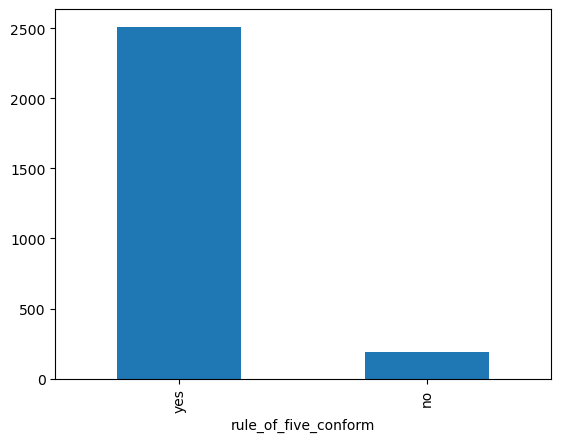

In [14]:
# Delete empty rows --> rule of five
fil_df = df_molecule[df_molecule['rule_of_five_conform']=='yes']
print('# of compounds:', len(df_molecule))
print('# of compounds in filtered data set:', len(fil_df))
print("# of compounds not compliant with Lipinski's rule of five:", (len(df_molecule)-len(fil_df)))
print(df_molecule.rule_of_five_conform.value_counts())
df_molecule.rule_of_five_conform.value_counts().plot.bar()

Now we will save the dataset that has not been filtered

In [15]:
!mkdir -p data/
df_molecule.to_csv('data/compounds_P49841_lipinski.csv', index=False)

## Plot the properties of the rule of five per molecule as bar plots.

In [17]:
# Import the dataset
lipinski_comp = pd.read_csv('https://raw.githubusercontent.com/ramirezlab/CHEMO/main/2_PART_TWO/data/compounds_P49841_lipinski.csv')
lipinski_comp.head(10)

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,484.211055,7,1,3.2107,yes
4,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
5,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,489.143704,7,1,3.4007,yes
6,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,389.196408,7,3,2.3006,yes
7,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,380.176088,7,0,2.0915,yes
8,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,419.206973,8,3,2.3092,yes
9,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,393.171336,7,3,1.9218,yes


In [9]:
comp_5_lipinski = lipinski_comp.iloc[:5]
comp_5_lipinski

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,484.211055,7,1,3.2107,yes
4,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes


#### Now we will make the bar plot.

In [10]:
ro5_properties = {
    "MW": (500, "molecular weight (Da)"),
    "HBA": (10, "# HBA"),
    "HBD": (5, "# HBD"),
    "LogP": (5, "logP"),
}

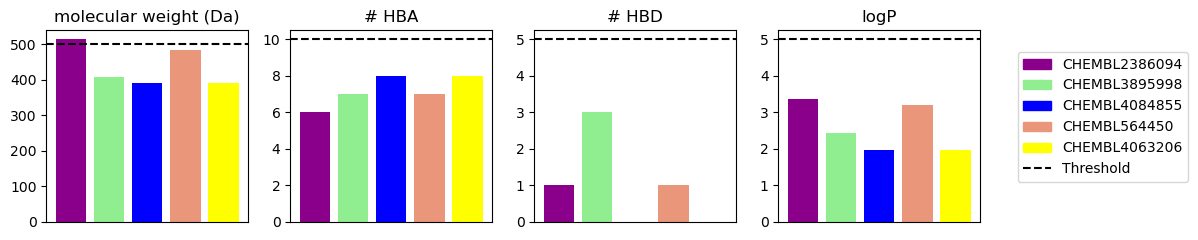

In [11]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(comp_5_lipinski) + 1)
colors = ["DarkMagenta", "LightGreen", "blue", "DarkSalmon", "yellow"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([0, 1, 2, 3, 4], comp_5_lipinski [key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [mpatches.Patch(color=colors[index], label=row["molecule_chembl_id"]) for index, row in comp_5_lipinski.iterrows()]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

## Plot the properties of the rule of five per molecule as scatter plots.

<Figure size 2000x2000 with 0 Axes>

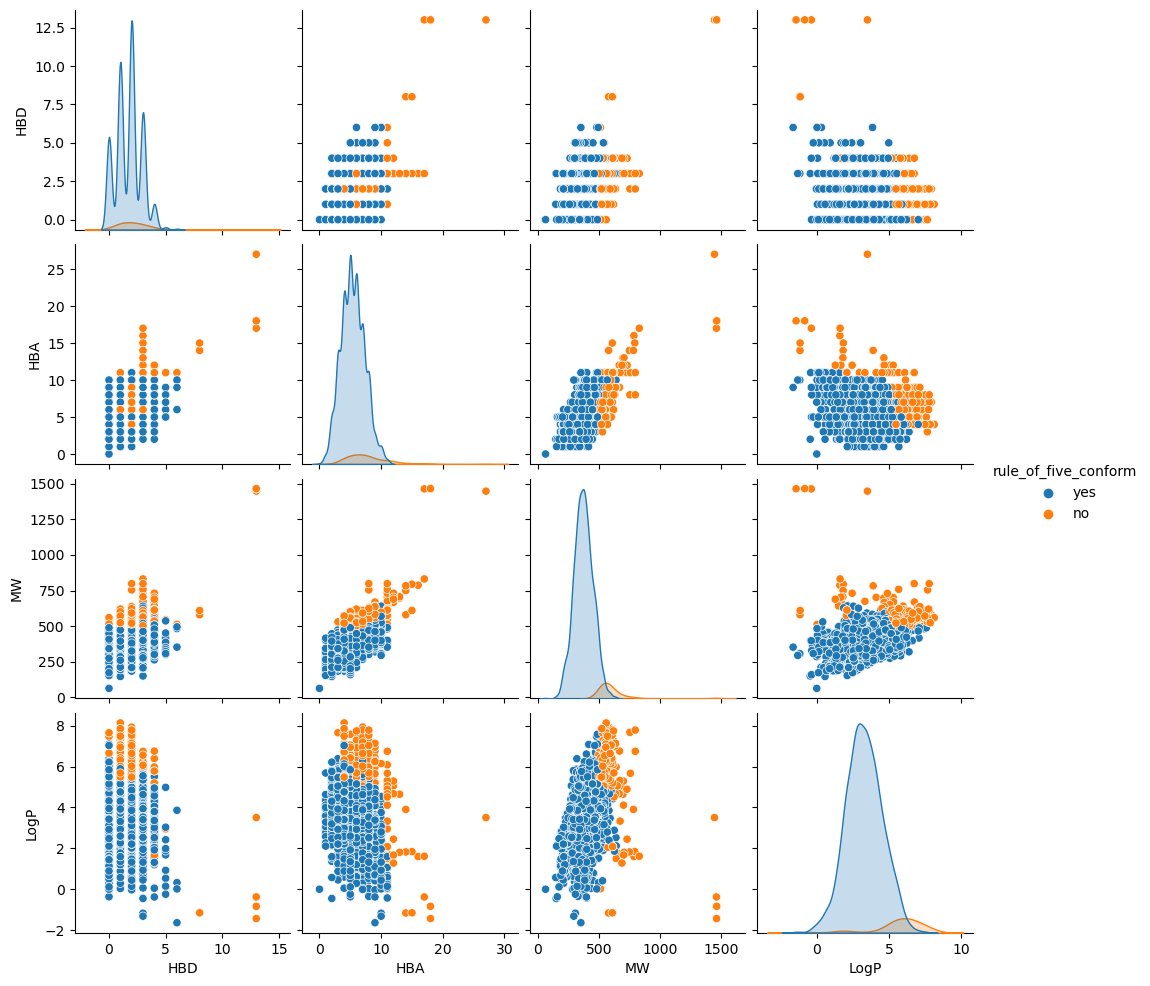

In [12]:
fig = plt.figure(figsize=(20, 20))
ax = sns.pairplot(data=lipinski_comp, vars=['HBD', 'HBA', 'MW', 'LogP'], hue='rule_of_five_conform')
plt.show()
plt.close()

## Plot the properties of the rule of five per molecule as radar plot.

In [18]:
# Import the dataset
lipinski_comp = pd.read_csv('https://raw.githubusercontent.com/ramirezlab/CHEMO/main/2_PART_TWO/data/compounds_P49841_lipinski.csv')
lipinski_comp.head(10)

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,484.211055,7,1,3.2107,yes
4,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
5,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,489.143704,7,1,3.4007,yes
6,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,389.196408,7,3,2.3006,yes
7,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,380.176088,7,0,2.0915,yes
8,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,419.206973,8,3,2.3092,yes
9,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,393.171336,7,3,1.9218,yes


Because the chemical properties of the rule of five are on different orders of magnitude, we need to transform them in order to visualize them on the radar diagram. In this case, the best way is to transform the data in such a way that the validation bounds are all 5:

- Original MW: 500 g/mol - Modified NW: 5 - Rule: MW/100 (Molecular weight (g/mol)/100)
- Original HBA: 10 - Modified HBA: 5 - Rule: HBA/2 (# H-bond acceptors/2)
- Original HBD: 5 - does not change (# H-bond donors)
- Original LogP: 5 - does not change (LogP)

Therefore, we are going to transform the `MW` and `HBA` columns, (the new ones are added in the last columns):

In [14]:
lipinski_comp['MW*100'] = lipinski_comp['MW']/100
lipinski_comp['HBA*2'] = lipinski_comp['HBA']/2
lipinski_comp.head(10)

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform,MW*100,HBA*2
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,514.165248,6,1,3.3616,yes,5.141652,3.0
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,407.186987,7,3,2.4397,yes,4.071870,3.5
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes,3.921961,4.0
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,484.211055,7,1,3.2107,yes,4.842111,3.5
4,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes,3.921961,4.0
5,CHEMBL2386090,9.70,O=C1NC(=O)C(c2cn3c4c(cccc24)CN(C(=O)c2cnccn2)C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,489.143704,7,1,3.4007,yes,4.891437,3.5
6,CHEMBL3963605,9.70,Nc1ncc(-c2ccccc2)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,389.196408,7,3,2.3006,yes,3.891964,3.5
7,CHEMBL4077376,9.70,C[C@@H]1CN(c2ccccc2F)CCN1c1nc(-c2ccncn2)cc(=O)n1C,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,380.176088,7,0,2.0915,yes,3.801761,3.5
8,CHEMBL3942619,9.70,COc1ccc(-c2cnc(N)c(C(=O)Nc3cnccc3N3CCC(N)CC3)n...,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,419.206973,8,3,2.3092,yes,4.192070,4.0
9,CHEMBL3957649,9.70,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCNCC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,393.171336,7,3,1.9218,yes,3.931713,3.5


For the radar chart we need the mean and standard deviations of a data set, so we will create a function that allows us to calculate these two statistics for the scaled values.

In [15]:
metrics_Ro5_stats_scaled = lipinski_comp[['MW*100', 'HBA*2', 'HBD', 'LogP']].agg(["mean", "std"])
metrics_Ro5_stats_scaled

,MW*100,HBA*2,HBD,LogP
mean,3.885328,2.773429,1.764396,3.426328
std,1.019386,1.062806,1.199038,1.439209


Now let's create the function that performs the graph. The dataset must be given as input.
The function scales the data and finds the mean and standard deviation for the radarplot.

In [16]:
def plot_radar(dataframe):
    from math import pi
    import numpy as np

    # ------- PART 0: Scaled Data Set / Metrics
    df = dataframe.copy()
    df['MW*100'] = df['MW']/100
    df['HBA*2'] = df['HBA']/2

    metrics_Ro5_stats_scaled = df[['MW*100', 'HBA*2', 'HBD', 'LogP']].agg(["mean", "std"])
    stats_mean = metrics_Ro5_stats_scaled.loc['mean']
    stats_std = metrics_Ro5_stats_scaled.loc['std']

    # ------- PART 1: Create Background
     # number of variables
    N = 4

    # What will be the angle of each axis on the graph? (we split the plot / variable number)    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

   # Initialize the radar diagram
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
      # ax.set_theta_offset(pi/2)
      # ax.set_theta_direction(-1)

    # Draw an ax per variable + add labels
    categories = ['MW (g/mol)*100', '# HBA*2', '# HBD', 'LogP']
    plt.xticks(angles[:-1], categories, size=14)

    # Draw Y-axis labels
    ax.set_rlabel_position(0)
    plt.yticks([1, 3, 5, 7], ["1", "3", "5", "7"],
               color="grey", size=12)
    plt.ylim(0,7)

      # ------- PART 2: Add parcels
      # Plot each individual = each line of data
      # data
    data = stats_mean.values
    data = np.append(data, data[0])  # close polygon
    ax.plot(angles, data, linewidth=3, linestyle='solid', color='purple', label="mean")
    # data + std
    data_std_up = stats_mean.values + stats_std.values
    data_std_up = np.append(data_std_up, data_std_up[0])  # close polygon 
    ax.plot(angles, data_std_up, linewidth=2, linestyle='dashed', color='limegreen', label="mean + std")
    # data - std
    data_std_down = stats_mean.values - stats_std.values
    data_std_down = np.append(data_std_down, data_std_down[0])  # close polygon
    ax.plot(angles, data_std_down, linewidth=2, linestyle='dashed', color='limegreen', label="mean - std")
    # Legend (polar coordinates)
    ax.text(-np.pi/3, 8, f'# Total data: {len(dataframe)}', size=14)

    # area rule of five
     # "MW/100": 5, "HBA/2": 5, "HBD": 5, "LogP": 5
    ro5_properties = [5, 5, 5, 5, 5]

    ax.fill(angles, ro5_properties, 'thistle', alpha=0.6, label="rule of five area")

   # add legend
    plt.legend(loc='upper right')

    # show the graph
    plt.show()

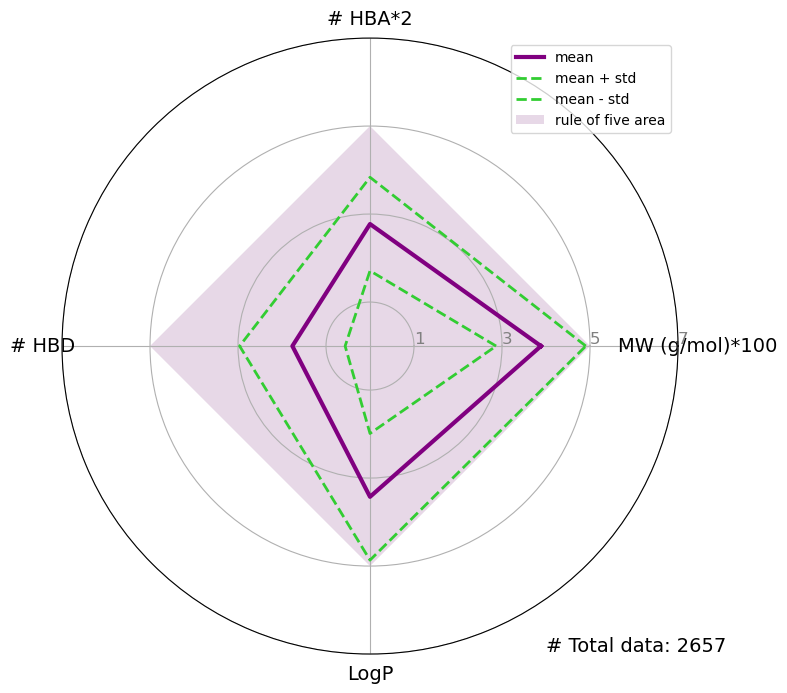

In [17]:
# We plot the radarplot for the dataset of compounds (ALL).
plot_radar(df_molecule)

### Radar plot - Rof comfort: YES
Now we are going to repeat the process, but only with the molecules that passed the rule of five test.
We must first filter the set `rule_of_five_conform: yes`

In [18]:
df_molecule_Ro5_yes = df_molecule[df_molecule['rule_of_five_conform']=='yes']
df_molecule_Ro5_yes.reset_index(inplace=True, drop=True)
# set of data that do satisfy the rule
df_molecule_Ro5_yes

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL2386094,10.89,O=C1NC(=O)C(c2cn3c4c(cc(F)cc24)CN(C(=O)N2CCOCC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,514.165248,6,1,3.3616,yes
1,CHEMBL3895998,10.00,Nc1ncc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC(N)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,407.186987,7,3,2.4397,yes
2,CHEMBL4084855,10.00,COc1ccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](C...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
3,CHEMBL564450,9.85,COc1cc(C2=C(c3cn(CCN4CCN(C)CC4)c4ccccc34)C(=O)...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,484.211055,7,1,3.2107,yes
4,CHEMBL4063206,9.70,COc1cccc(N2CCN(c3nc(-c4ccncn4)cc(=O)n3C)[C@H](...,<rdkit.Chem.rdchem.Mol object at 0x000001E1423...,392.196074,8,0,1.9610,yes
...,...,...,...,...,...,...,...,...,...
2472,CHEMBL3986013,3.49,O=C1Nc2ncccc2N[C@H]1Cc1c[nH]c2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,278.116761,3,3,2.5382,yes
2473,CHEMBL48082,3.46,Nc1nccc(-c2c[nH]c3ccccc23)n1,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,210.090546,3,2,2.2071,yes
2474,CHEMBL50226,3.38,Nc1nccc(-c2cc3ccccc3[nH]2)n1,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,210.090546,3,2,2.2071,yes
2475,CHEMBL2207943,3.32,CN1C(=O)CC(c2cccs2)Sc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,275.043856,3,0,3.9480,yes


We plot the radarplot for the filtered dataset

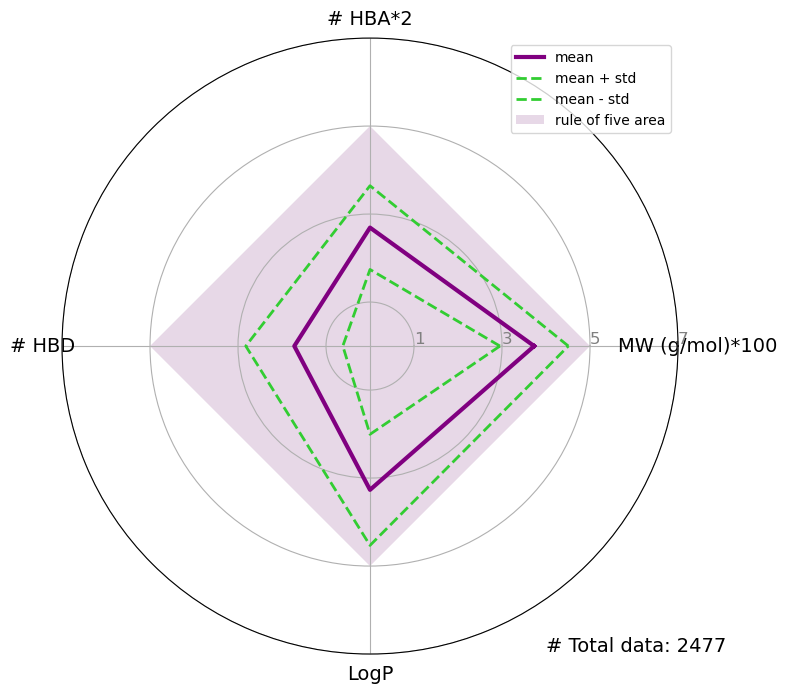

In [19]:
plot_radar(df_molecule_Ro5_yes)

## Radar plot - Rof comfort: NO
Now we are going to repeat the process, but only with the molecules that passed the rule of five test.
We must first filter the set `rule_of_five_conform: no`


In [20]:
df_molecule_Ro5_no = df_molecule[df_molecule['rule_of_five_conform']=='no']
df_molecule_Ro5_no.reset_index(inplace=True, drop=True)
df_molecule_Ro5_no

,molecule_chembl_id,pchembl_value,smiles,ROMol,MW,HBA,HBD,LogP,rule_of_five_conform
0,CHEMBL1684800,8.56,COc1ccc(Cn2ncc(NC(=O)c3cc(NC(=O)Nc4ccc(Cl)c(C(...,<rdkit.Chem.rdchem.Mol object at 0x000001E1425...,572.155051,6,4,6.39912,no
1,CHEMBL1231352,8.52,CN(C)c1nc2ccc1CCCCn1cc(c3ccccc31)C1=C(C(=O)NC1...,<rdkit.Chem.rdchem.Mol object at 0x000001E1425...,543.263425,6,1,5.59330,no
2,CHEMBL3647956,8.30,N#Cc1sc(NCCNc2nc(-c3ccc(Cl)cc3Cl)cn3nc(C(=O)NC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,545.055212,11,5,2.95188,no
3,CHEMBL247067,8.15,CN(C)c1cc2cc(n1)CCCn1cc(c3ccccc31)C1=C(C(=O)NC...,<rdkit.Chem.rdchem.Mol object at 0x000001E1424...,529.247775,6,1,5.20320,no
4,CHEMBL3647954,8.10,CCOC(=O)c1cc2c(N3CCCC(Nc4nc(N)c(C(C)=O)s4)C3)n...,<rdkit.Chem.rdchem.Mol object at 0x000001E1427...,573.111664,11,2,5.20200,no
...,...,...,...,...,...,...,...,...,...
175,CHEMBL5081821,4.04,Cn1c(NCCCCCCCNc2c3c(nc4cc(Br)ccc24)CCCC3)nc(-c...,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,592.196150,7,2,6.64540,no
176,CHEMBL5073240,4.02,Cn1c(NCCCCCCCNc2c3c(nc4ccc(F)cc24)CCCC3)nc(-c2...,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,532.276216,7,2,6.02200,no
177,CHEMBL451532,4.00,C[C@@H]1O[C@@H](O[C@H]2[C@H](Oc3cc(O)c4c(c3)O[...,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,580.179206,14,8,-1.16520,no
178,CHEMBL4294709,4.00,NC(=O)c1ccccc1CN1C(=O)CC(c2ccc(C(=O)NCc3ccccc3...,<rdkit.Chem.rdchem.Mol object at 0x000001E1422...,521.177313,4,2,5.48580,no


We plot the radarplot for the dataset of compounds that violate the Ro5

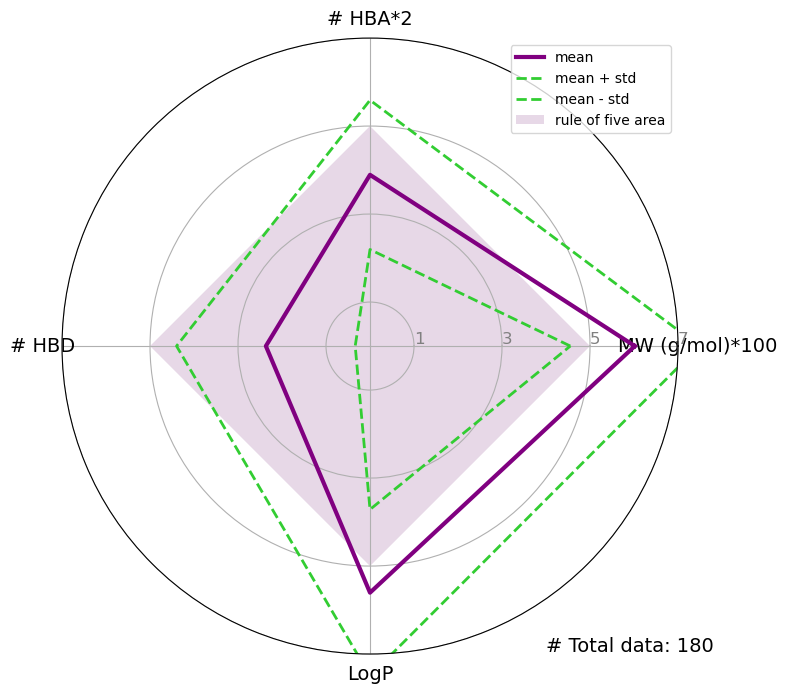

In [21]:
plot_radar(df_molecule_Ro5_no)

## Practice Activity

Taking into account what has been reviewed in this second part, make a code in python with which you can:

1. Make a bar chart for the entire data set
2. Make a scatterplot for the data set that satisfies the rule of five

At the end, you must prepare a document in PDF format in which you attach the proposed code and the output of the execution.

## Conclusion

In this practice, we have learned about Lipinski's rule of five as a measure to estimate a compound's oral bioavailability and we have applied the rule on a dataset n order to filter it and discard those compounds that meet two or more of the criteria. Also, we learn dto make simple graphs such as bar graphs that allow us to visualize the data set as a whole or each compound of the data set. In addition, we learned to make scatterplots that allow us to observe the data set against the four criteria of the Lipinski rule. Finally, we build a more complex plot like the radar plot which allows us to compare multiple variables (Lipinski rules) on a single plot.

# References
1. Grogan, S., & Preuss, C. V. (2022). Pharmacokinetics. En StatPearls. StatPearls Publishing. http://www.ncbi.nlm.nih.gov/books/NBK557744/
2. Doogue, M. P., & Polasek, T. M. (2013). The ABCD of clinical pharmacokinetics. Therapeutic Advances in Drug Safety, 4(1), 5-7. https://doi.org/10.1177/2042098612469335
3. Turner, J. V., & Agatonovic-Kustrin, S. (2007). In silico prediction of oral bioavailability. En Comprehensive Medicinal Chemistry II (pp. 699-724). Elsevier. https://doi.org/10.1016/B0-08-045044-X/00147-4